<a href="https://colab.research.google.com/github/Mobodot/Ineuron_DL_assignments/blob/main/mnist_imageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

root = "/content/drive/MyDrive/Colab Notebooks"
os.chdir(root)

In [3]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

In [4]:
import tensorflow as tf

In [5]:
tf.__version__

'2.8.2'

In [6]:
tf.keras.__version__

'2.8.0'

In [7]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
tf.config.list_physical_devices("CPU")


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [9]:
CheckList = ["GPU", "CPU"]

for device in CheckList:
  out_ = tf.config.list_physical_devices(device)
  if len(out_) > 0:
    print(f"{device } is avialable")
    print("details", out_)
  else:
    print(f"{device} is not available")


GPU is avialable
details [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is avialable
details [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
mnist = tf.keras.datasets.mnist

(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [12]:
X_train_full.shape

(60000, 28, 28)

In [13]:
y_train_full.shape

(60000,)

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
X_train_full.dtype

dtype('uint8')

In [16]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255.0


(-0.5, 27.5, 27.5, -0.5)

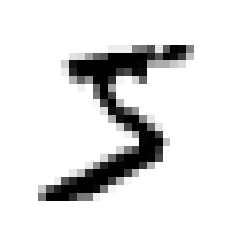

In [17]:
plt.imshow(X_train_full[0],cmap="binary")
plt.axis("off")

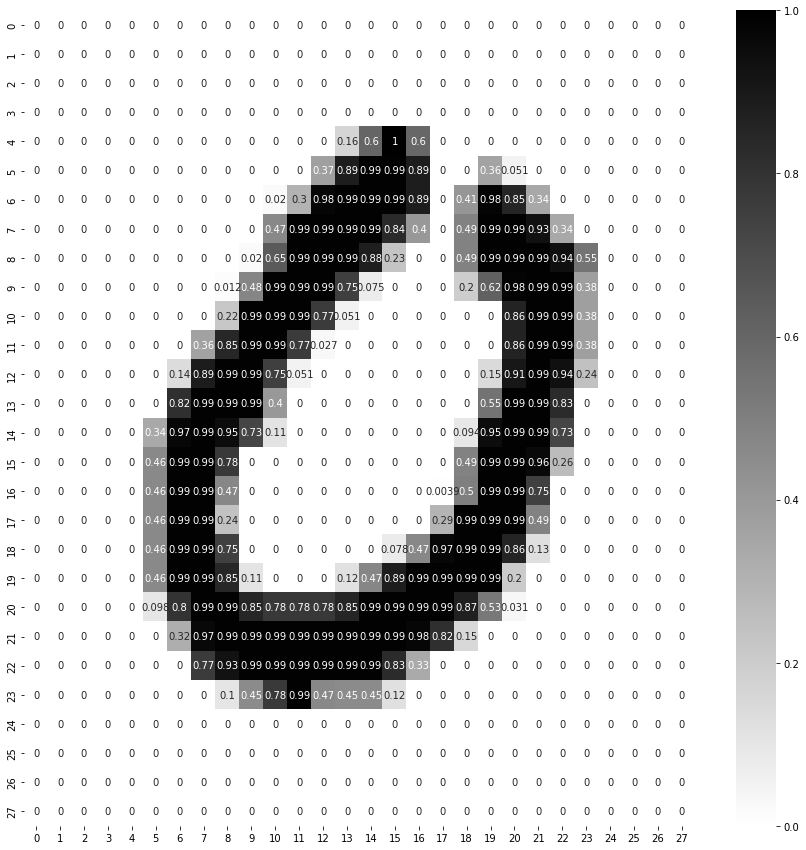

In [18]:
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(X_train[7], annot=True, cmap="binary")

In [19]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayers"),
    tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
    tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
    tf.keras.layers.Dense(10, activation="softmax", name="outputLayer1")

]

In [20]:
model_clf = tf.keras.Sequential(LAYERS)

In [21]:
model_clf.layers

In [22]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayers (Flatten)       (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer1 (Dense)        (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
784*300 + 300 # no of parameters for first layer

235500

In [24]:
300*100 + 100 # no of parameters for second layer

30100

In [25]:
100*10 + 10 # no of parameters for third layer

1010

In [26]:
235500+30100+1010 # no of trainable params

266610

In [27]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [28]:
model_clf.get_layer(hidden1.name) is hidden1

True

In [29]:
type(hidden1.get_weights())

list

In [30]:
hidden1.get_weights()

[array([[-0.02744273, -0.03657226,  0.03453033, ...,  0.03920438,
         -0.03242682, -0.04329392],
        [ 0.07349712,  0.00080945,  0.07395296, ..., -0.04268297,
         -0.04574032, -0.02779813],
        [ 0.03657538, -0.0185102 , -0.06923304, ...,  0.06683496,
         -0.02620417, -0.04392947],
        ...,
        [-0.02739546,  0.0110965 , -0.04116626, ..., -0.01557036,
          0.037602  ,  0.01637167],
        [ 0.01932905,  0.00677472,  0.02382268, ...,  0.05963758,
          0.0175924 , -0.05569717],
        [ 0.01789012,  0.00937501,  0.0170994 , ..., -0.05818906,
          0.06308141, -0.00237235]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [31]:
weights, biases = hidden1.get_weights()

In [32]:
print('shape\n', weights.shape, '\n')

weights

shape
 (784, 300) 



array([[-0.02744273, -0.03657226,  0.03453033, ...,  0.03920438,
        -0.03242682, -0.04329392],
       [ 0.07349712,  0.00080945,  0.07395296, ..., -0.04268297,
        -0.04574032, -0.02779813],
       [ 0.03657538, -0.0185102 , -0.06923304, ...,  0.06683496,
        -0.02620417, -0.04392947],
       ...,
       [-0.02739546,  0.0110965 , -0.04116626, ..., -0.01557036,
         0.037602  ,  0.01637167],
       [ 0.01932905,  0.00677472,  0.02382268, ...,  0.05963758,
         0.0175924 , -0.05569717],
       [ 0.01789012,  0.00937501,  0.0170994 , ..., -0.05818906,
         0.06308141, -0.00237235]], dtype=float32)

In [33]:
print('shape\n', biases.shape, '\n')

biases

shape
 (300,) 



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## Tensorboard Callback

In [34]:
import time

def get_log_path(log_dir="logs/fit"):
  filename = time.strftime("log_%Y_%m_%s_%H_%M_%S")
  log_path = os.path.join(log_dir, filename)
  print(f"saving logs at {log_path}")
  return log_path

log_dir = get_log_path()

tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

saving logs at logs/fit/log_2022_08_1661798570_18_42_50


## Early Stopping callback


In [35]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,
                                                     restore_best_weights=True)

## Model Checkpointing callback
This is used when a problem occurs during trainin so we don't have to retrain the model from begining. It will continue from where it stopped.

In [56]:
CKPT_path = "model.ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path,
                                                      save_best_only=True)

## Model Training

In [36]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparese_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate => tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]


model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [37]:
# Alternative approach
# model_clf.compile(loss=tf.keras.sparse_categorical_crossentropy,
#                   optimizer=tf.keras.optimizers.SGD(0.02),
#                   metrics=["accuracy"])

In [59]:
import time
start_time = time.time()
# EPOCHS = 30
EPOCHS = 50
# EPOCHS = 1000

VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                        validation_data=VALIDATION_SET,
                        callbacks=[tb_cb, 
                                   early_stopping_cb,
                                   checkpointing_cb])
end_time = time.time()

duration = f"duration of time = {end_time-start_time}s"
print(duration)

Epoch 1/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0086 - accuracy: 0.9995 - val_loss: 0.0698 - val_accuracy: 0.9798
Epoch 2/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0083 - accuracy: 0.9994 - val_loss: 0.0699 - val_accuracy: 0.9800
Epoch 3/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0079 - accuracy: 0.9995 - val_loss: 0.0711 - val_accuracy: 0.9802
Epoch 4/50
 828/1719 [=============>................] - ETA: 2s - loss: 0.0070 - accuracy: 0.9996

KeyboardInterrupt: ignored

## Using checkpointing callback

In [60]:
import time
start_time = time.time()


ckpt_model = tf.keras.models.load_model(CKPT_path)

history = ckpt_model.fit(X_train, y_train, epochs=EPOCHS,
                        validation_data=VALIDATION_SET,
                        callbacks=[tb_cb, 
                                   early_stopping_cb,
                                   checkpointing_cb])
end_time = time.time()

duration = f"duration of time = {end_time-start_time}s"
print(duration)

Epoch 1/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0076 - accuracy: 0.9995 - val_loss: 0.0699 - val_accuracy: 0.9814
Epoch 2/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0073 - accuracy: 0.9995 - val_loss: 0.0695 - val_accuracy: 0.9810
Epoch 3/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0070 - accuracy: 0.9996 - val_loss: 0.0702 - val_accuracy: 0.9802
Epoch 4/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0067 - accuracy: 0.9997 - val_loss: 0.0707 - val_accuracy: 0.9808
Epoch 5/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0065 - accuracy: 0.9997 - val_loss: 0.0699 - val_accuracy: 0.9814
Epoch 6/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0062 - accuracy: 0.9998 - val_loss: 0.0713 - val_accuracy: 0.9802
Epoch 7/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0060 - accuracy: 0.9997 - val_loss: 0.0706 - val_accuracy:

## saving the model

In [39]:
import time
import os

def saveModel_path(model_dir="TRAINED_MODEL"):
  os.makedirs(model_dir, exist_ok=True)
  filename = time.strftime("model_%y_%m_%d_%H_%M_%S.h5")
  model_path = os.path.join(model_dir, filename)
  print(f"model: {filename} will be saved at {model_path}")
  return model_path

In [40]:
UNIQUE_PATH = saveModel_path()
UNIQUE_PATH

model: model_22_08_29_18_47_01.h5 will be saved at TRAINED_MODEL/model_22_08_29_18_47_01.h5


'TRAINED_MODEL/model_22_08_29_18_47_01.h5'

In [41]:
tf.keras.models.save_model(model_clf, UNIQUE_PATH)

In [42]:
history.params

{'verbose': 1, 'epochs': 1000, 'steps': 1719}

In [43]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.616513,0.839818,0.306452,0.9138
1,0.288020,0.917927,0.239200,0.9352
2,0.233703,0.933036,0.203125,0.9450
3,0.199578,0.942818,0.174316,0.9514
4,0.174602,0.950636,0.158239,0.9568
5,0.155567,0.954855,0.143364,0.9582
6,0.140273,0.959855,0.134068,0.9616
7,0.126839,0.963327,0.126081,0.9662
8,0.115997,0.966927,0.113367,0.9700
9,0.106353,0.969800,0.109282,0.9700


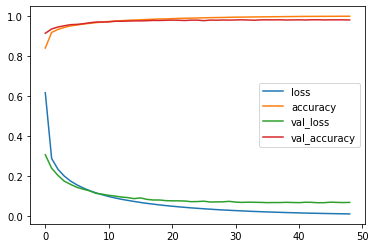

In [44]:
pd.DataFrame(history.history).plot()

## Evaluating the model

In [45]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0703 - accuracy: 0.9792


[0.07027532160282135, 0.979200005531311]

## Predictions

In [46]:
X_new = X_test[:3]

print(X_new.shape)
y_prob = model_clf.predict(X_new)

y_prob.round(3)

(3, 28, 28)


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001,
        0.   ]], dtype=float32)

In [47]:
y_pred = np.argmax(y_prob, axis=1)
y_pred

array([7, 2, 1])

In [48]:
y_test_new = y_test[:3]
y_test_new

array([7, 2, 1], dtype=uint8)

In [49]:
a = [1,2,3]
b = [4,65,6]
c = [9,8,7]
list(zip(a,b,c))

[(1, 4, 9), (2, 65, 8), (3, 6, 7)]

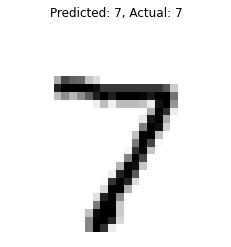

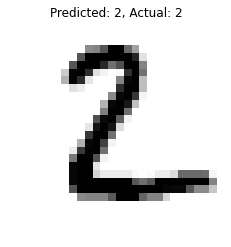

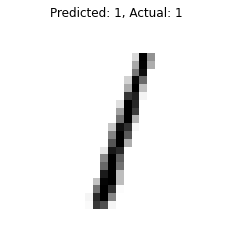

In [50]:
for data,pred,actual in zip(X_new[:3],y_pred,y_test_new):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  # print("########################")
  print("\n")

In [51]:
loaded_model = tf.keras.models.load_model("TRAINED_MODEL/model_22_08_29_16_17_01.h5")

In [52]:
loaded_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0686 - accuracy: 0.9787


[0.06859098374843597, 0.9786999821662903]

## Display Train and validation set using tensorboard

In [53]:
%reload_ext tensorboard

In [54]:
!kill 2785
625.0

/bin/bash: line 0: kill: (2785) - No such process


In [55]:
%tensorboard --logdir logs/fit

<IPython.core.display.Javascript object>